Beginners level Machine Learning (ML) project to build my skills. The aim here is to predict a students final score (G3) based on a number of factors. This will be a regression based ML project using sklearn.

In [66]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
print(maths.info())
maths.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


e:\pythonEnvs\MLcpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\pythonEnvs\MLcpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\pythonEnvs\MLcpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\pythonEnvs\MLcpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decre

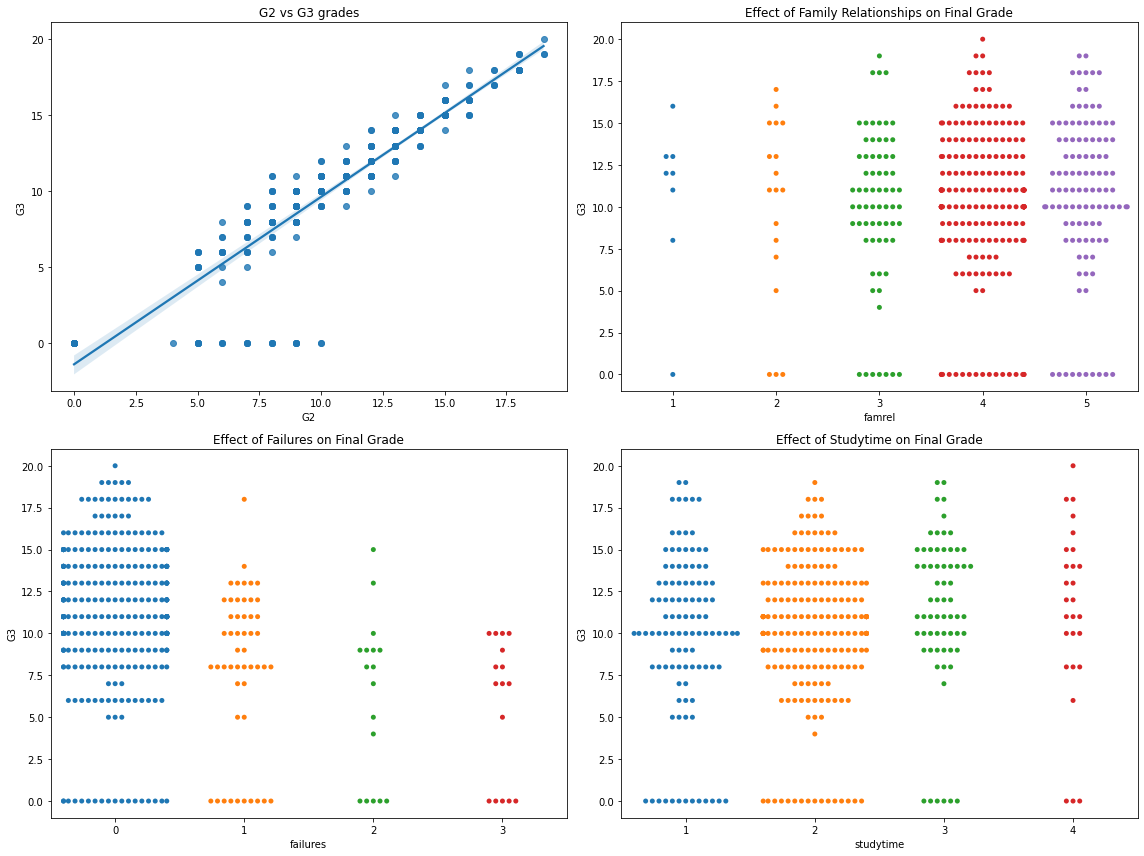

In [68]:
# Lets do some visual-EDA on our data which we will use

fig, axes = plt.subplots(2, 2, figsize=(16,12))

sns.regplot('G2', 'G3', data=maths, ax=axes[0, 0]).set_title('G2 vs G3 grades')
sns.swarmplot('failures', 'G3', data=maths, ax=axes[1, 0]).set_title('Effect of Failures on Final Grade')
sns.swarmplot('famrel', 'G3', data=maths, ax=axes[0, 1]).set_title('Effect of Family Relationships on Final Grade')
sns.swarmplot('studytime', 'G3', data=maths, ax=axes[1, 1]).set_title('Effect of Studytime on Final Grade')
plt.tight_layout()
plt.show()

Important to note here that the data is generally very well structured. There are no missing values and it is very complete. However sklearn can only accept numerical inputs. In this case I will only use some of the numerical columns we have. I will leave the pre-processing of labeled data for a more in-depth project.

In [69]:
maths = maths.select_dtypes('int64')
maths = maths[['famrel', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']]
print(maths.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths.drop(predict, axis=1))
y = np.array(maths[predict])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   famrel     395 non-null    int64
 1   studytime  395 non-null    int64
 2   failures   395 non-null    int64
 3   absences   395 non-null    int64
 4   G1         395 non-null    int64
 5   G2         395 non-null    int64
 6   G3         395 non-null    int64
dtypes: int64(7)
memory usage: 21.7 KB
None


In [70]:
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [71]:
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

The R^2 is:  0.8316968124174093
famrel :  0.5675565229094427
studytime :  -0.46968540367724987
failures :  -0.5180844666140668
absences :  0.029015504354730548
G1 :  0.11790811767680992
G2 :  0.9549903285694339
The intercept of our slope is:  -2.3293128685712094


In conclusion our model explains 83% of the inputs into a students final
score. What we can clearly see is the biggest factor going into the estimation
is the score that they would get in G2. What does look interesting is the fact that
studytime is negatively related to the grade that they get, however this is a very
small factor. 

In [72]:
maths1 = maths[['famrel','failures', 'absences', 'G2', 'G3']]

print(maths1.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths1.drop('G3', axis=1))
y = np.array(maths1['G3'])
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths1.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   famrel    395 non-null    int64
 1   failures  395 non-null    int64
 2   absences  395 non-null    int64
 3   G2        395 non-null    int64
 4   G3        395 non-null    int64
dtypes: int64(5)
memory usage: 15.6 KB
None
The R^2 is:  0.8325314539371342
famrel :  0.6082176851843556
failures :  -0.33970006136169495
absences :  0.025964316592543835
G2 :  1.044780106391494
The intercept of our slope is:  -3.226643599123685


## Second Regression Model

In [73]:
maths2 = maths[['famrel','G1', 'G2', 'G3']]
print(maths.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths2.drop(predict, axis=1))
y = np.array(maths2[predict])
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths2.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   famrel     395 non-null    int64
 1   studytime  395 non-null    int64
 2   failures   395 non-null    int64
 3   absences   395 non-null    int64
 4   G1         395 non-null    int64
 5   G2         395 non-null    int64
 6   G3         395 non-null    int64
dtypes: int64(7)
memory usage: 21.7 KB
None
The R^2 is:  0.8290031623569941
famrel :  0.6146315680614332
G1 :  0.05740540027614438
G2 :  1.0223172971635714
The intercept of our slope is:  -3.6003818667182355


## Third Regression Model 

In [74]:
maths3 = maths[['studytime', 'G3']]
print(maths3.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths3.drop(predict, axis=1))
y = np.array(maths3[predict])
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths3.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   studytime  395 non-null    int64
 1   G3         395 non-null    int64
dtypes: int64(2)
memory usage: 6.3 KB
None
The R^2 is:  -0.023733611640623264
studytime :  -0.38093338651775005
The intercept of our slope is:  11.194654966094934


## Fifth Model

In [75]:
maths4 = maths[['famrel', 'absences', 'G1',  'G3']]
print(maths4.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths4.drop(predict, axis=1))
y = np.array(maths4[predict])
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths4.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   famrel    395 non-null    int64
 1   absences  395 non-null    int64
 2   G1        395 non-null    int64
 3   G3        395 non-null    int64
dtypes: int64(4)
memory usage: 12.5 KB
None
The R^2 is:  0.6513660742622447
famrel :  0.6517302323536082
absences :  0.004830458982945207
G1 :  0.9358691735860499
The intercept of our slope is:  -2.372810284589473


## Sixth Model

In [76]:
maths5 = maths[['G2', 'G3']]
print(maths5.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths5.drop(predict, axis=1))
y = np.array(maths5[predict])
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths5.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G2      395 non-null    int64
 1   G3      395 non-null    int64
dtypes: int64(2)
memory usage: 6.3 KB
None
The R^2 is:  0.8272284743826337
G2 :  1.0671618287753928
The intercept of our slope is:  -0.9537819537032224


## Seventh Model

In [77]:
maths6 = maths[[ 'G1', 'G2', 'G3']]
print(maths6.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths6.drop(predict, axis=1))
y = np.array(maths6[predict])
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths6.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      395 non-null    int64
 1   G2      395 non-null    int64
 2   G3      395 non-null    int64
dtypes: int64(3)
memory usage: 9.4 KB
None
The R^2 is:  0.8300389828696426
G1 :  0.06514147578365931
G2 :  1.0244288702112079
The intercept of our slope is:  -1.200836411687515


## Eighth Model

In [78]:
maths7 = maths[[ 'failures', 'absences', 'G1', 'G2', 'G3']]
print(maths7.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths7.drop(predict, axis=1))
y = np.array(maths7[predict])
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths7.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   failures  395 non-null    int64
 1   absences  395 non-null    int64
 2   G1        395 non-null    int64
 3   G2        395 non-null    int64
 4   G3        395 non-null    int64
dtypes: int64(5)
memory usage: 15.6 KB
None
The R^2 is:  0.8349773547108821
failures :  -0.3900339810957194
absences :  0.024977456255196873
G1 :  0.06694827808985931
G2 :  1.0045459232498906
The intercept of our slope is:  -1.018599410149566


## Ninth Model

In [79]:
maths8 = maths[['famrel', 'studytime', 'failures', 'G3']]
print(maths8.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths8.drop(predict, axis=1))
y = np.array(maths8[predict])
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths8.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   famrel     395 non-null    int64
 1   studytime  395 non-null    int64
 2   failures   395 non-null    int64
 3   G3         395 non-null    int64
dtypes: int64(4)
memory usage: 12.5 KB
None
The R^2 is:  0.08230026291457504
famrel :  0.7180648431840415
studytime :  -0.7287539275943304
failures :  -2.202731341143811
The intercept of our slope is:  9.736880368707842


## Tenth Model

In [80]:
maths9 = maths[['famrel', 'studytime','G3']]
print(maths9.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(maths9.drop(predict, axis=1))
y = np.array(maths9[predict])
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)
# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(maths9.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   famrel     395 non-null    int64
 1   studytime  395 non-null    int64
 2   G3         395 non-null    int64
dtypes: int64(3)
memory usage: 9.4 KB
None
The R^2 is:  -0.04152422113686138
famrel :  0.8922931978446138
studytime :  -0.35512913568259497
The intercept of our slope is:  7.502511572460669
